# MINOR PROJECT

## READING NHANES BODY MEASUREMENT DATA

In [45]:
import pandas as pd

male_df = pd.read_csv(r"C:\Users\bhask\OneDrive\Desktop\minor_project\nhanes_adult_male_bmx_2020.csv")
female_df = pd.read_csv(r"C:\Users\bhask\OneDrive\Desktop\minor_project\nhanes_adult_female_bmx_2020.csv")

## CONVERTING DATAFRAMES INTO NUMPY MATRICES

In [46]:
male = male_df.to_numpy()
female = female_df.to_numpy()

print("Male matrix shape:", male.shape)
print("Female matrix shape:", female.shape)

Male matrix shape: (4081, 7)
Female matrix shape: (4221, 7)


## HISTOGRAM OF MALE AND FEMALE WEIGHTS

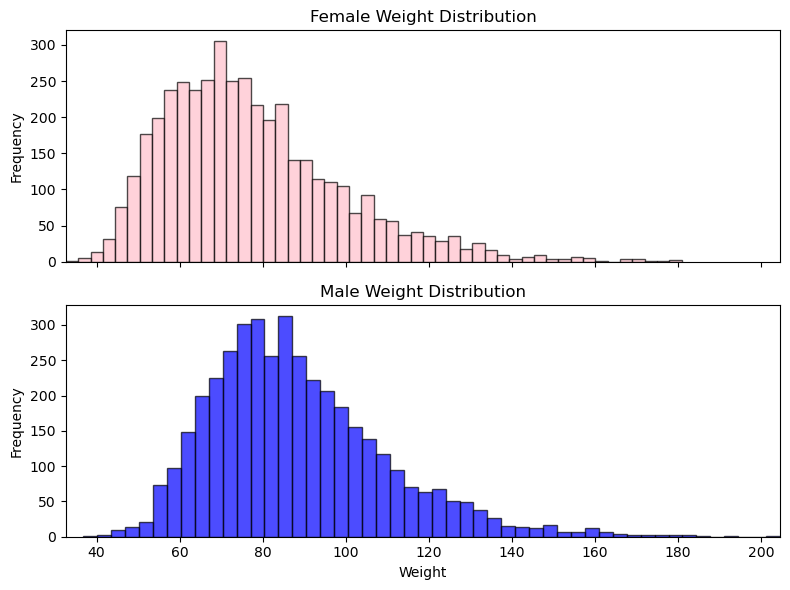

In [59]:
import matplotlib.pyplot as plt

male_weights = male[:, 0]
female_weights = female[:, 0]  
x_min = min(male_weights.min(), female_weights.min())
x_max = max(male_weights.max(), female_weights.max())

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

ax[0].hist(female_weights, bins=50, color='pink', edgecolor='black', alpha=0.7) 
ax[0].set_title("Female Weight Distribution")
ax[0].set_ylabel("Frequency")

ax[1].hist(male_weights, bins=50, color='blue', edgecolor='black', alpha=0.7)
ax[1].set_title("Male Weight Distribution")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Weight")

ax[0].set_xlim(x_min, x_max)
ax[1].set_xlim(x_min, x_max)
plt.tight_layout()
plt.show()

## BOXPLOT OF MALE AND FEMALE WEIGHT FOR COMAPRISON

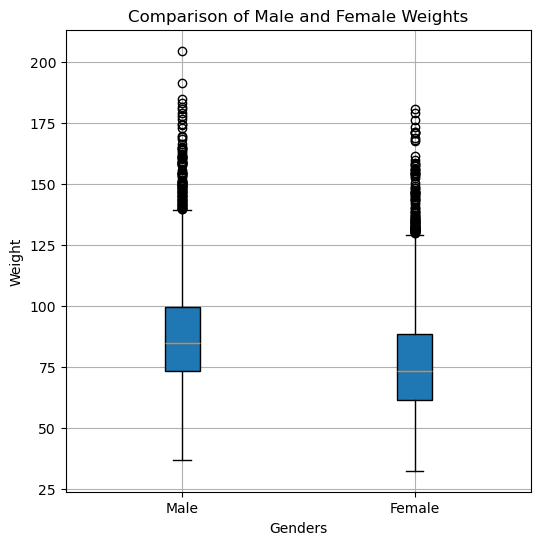

In [48]:
male_weights = male[:,0]
female_weights = female[:,0]

plt.figure(figsize=(6, 6))
plt.boxplot([male_weights, female_weights], labels=['Male', 'Female'], patch_artist=True)

plt.title("Comparison of Male and Female Weights")
plt.xlabel("Genders")
plt.ylabel("Weight")
plt.grid(True)
plt.show()

In [49]:
male_df["BMXWT"].describe()

count    4081.000000
mean       88.364543
std        21.421561
min        36.800000
25%        73.300000
50%        85.000000
75%        99.800000
max       204.600000
Name: BMXWT, dtype: float64

In [50]:
female_df["BMXWT"].describe()

count    4221.000000
mean       77.403791
std        21.545061
min        32.600000
25%        61.600000
50%        73.600000
75%        88.700000
max       180.900000
Name: BMXWT, dtype: float64

## STATISTICAL ANALYSIS

In [51]:
import scipy.stats as stats

male_weights = male[:,0] 
female_weights = female[:,0]  

stats_male = {
    "Mean": np.mean(male_weights),
    "Median": np.median(male_weights),
    "Mode": stats.mode(male_weights, keepdims=True)[0][0],
    "Std Dev": np.std(male_weights, ddof=1),
    "Variance": np.var(male_weights, ddof=1),
    "Range": np.max(male_weights) - np.min(male_weights),
    "IQR": stats.iqr(male_weights),
    "Skewness": stats.skew(male_weights),
    "Kurtosis": stats.kurtosis(male_weights)
}

stats_female = {
    "Mean": np.mean(female_weights),
    "Median": np.median(female_weights),
    "Mode": stats.mode(female_weights, keepdims=True)[0][0],
    "Std Dev": np.std(female_weights, ddof=1),
    "Variance": np.var(female_weights, ddof=1),
    "Range": np.max(female_weights) - np.min(female_weights),
    "IQR": stats.iqr(female_weights),
    "Skewness": stats.skew(female_weights),
    "Kurtosis": stats.kurtosis(female_weights)
}

Mstat = pd.DataFrame(stats_male, index=['Male']).T 
Fstat = pd.DataFrame(stats_female, index=['Female']).T

print("Male Weight Statistics:\n", Mstat)
print("\nFemale Weight Statistics:\n", Fstat)

Male Weight Statistics:
                 Male
Mean       88.364543
Median     85.000000
Mode       79.000000
Std Dev    21.421561
Variance  458.883294
Range     167.800000
IQR        26.500000
Skewness    0.984281
Kurtosis    1.474288

Female Weight Statistics:
               Female
Mean       77.403791
Median     73.600000
Mode       75.800000
Std Dev    21.545061
Variance  464.189635
Range     148.300000
IQR        27.100000
Skewness    1.033361
Kurtosis    1.400968


## BMI as 8TH COLUMN OF MATRIX

In [60]:
import seaborn as sns

female_df = female_df.dropna()
height_m = female_df['BMXHT'] / 100
female_bmi = female_df['BMXWT'] / (height_m ** 2)
female_bmi = np.round(female_bmi, 1)
female_df["BMI"]=female_bmi
female_matrix = female_df.to_numpy()
print("Updated Female matrix shape:", female_matrix.shape)
print(female_df)

Updated Female matrix shape: (4221, 8)
      BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST   BMI
0      97.1  160.2     34.7    40.8     35.8   126.1     117.9  37.8
1      91.1  152.7     33.5    33.0     38.5   125.5     103.1  39.1
2      73.0  161.2     37.4    38.0     31.8   106.2      92.0  28.1
3      61.7  157.4     38.0    34.7     29.0   101.0      90.5  24.9
4      55.4  154.6     34.6    34.0     28.3    92.5      73.2  23.2
...     ...    ...      ...     ...      ...     ...       ...   ...
4216   66.8  157.0     32.6    38.4     30.7   103.8      92.5  27.1
4217  116.9  167.4     42.2    43.0     40.7   128.4     120.0  41.7
4218   73.0  159.6     36.2    37.0     31.4   104.6      99.3  28.7
4219   78.6  168.5     38.1    40.2     36.0   102.4      98.5  27.7
4220   82.8  147.8     34.8    32.8     39.5   121.4     110.0  37.9

[4221 rows x 8 columns]


## ZSCORE for standardization of data

In [53]:
zfemale = stats.zscore(female_matrix, axis=0, nan_policy='omit')
print(zfemale)
print("Standardized Female matrix shape:", zfemale.shape)

[[ 9.14295084e-01  8.95037880e-03 -5.67394633e-01 ...  1.08316157e+00
   1.11578462e+00  9.92545031e-01]
 [ 6.35775985e-01 -1.05306843e+00 -1.07893145e+00 ...  1.04475528e+00
   2.65088995e-01  1.16018565e+00]
 [-2.04423297e-01  1.50552886e-01  5.83563204e-01 ... -1.90646881e-01
  -3.72932724e-01 -2.58311918e-01]
 ...
 [-2.04423297e-01 -7.60111255e-02  7.20263874e-02 ... -2.93063641e-01
   4.66671455e-02 -1.80939323e-01]
 [ 5.55278621e-02  1.18425119e+00  8.81959680e-01 ... -4.33886685e-01
   6.83598104e-04 -3.09893648e-01]
 [ 2.50491231e-01 -1.74692071e+00 -5.24766565e-01 ...  7.82312335e-01
   6.61697091e-01  1.00544046e+00]]
Standardized Female matrix shape: (4221, 8)


## pairplot for standardized data

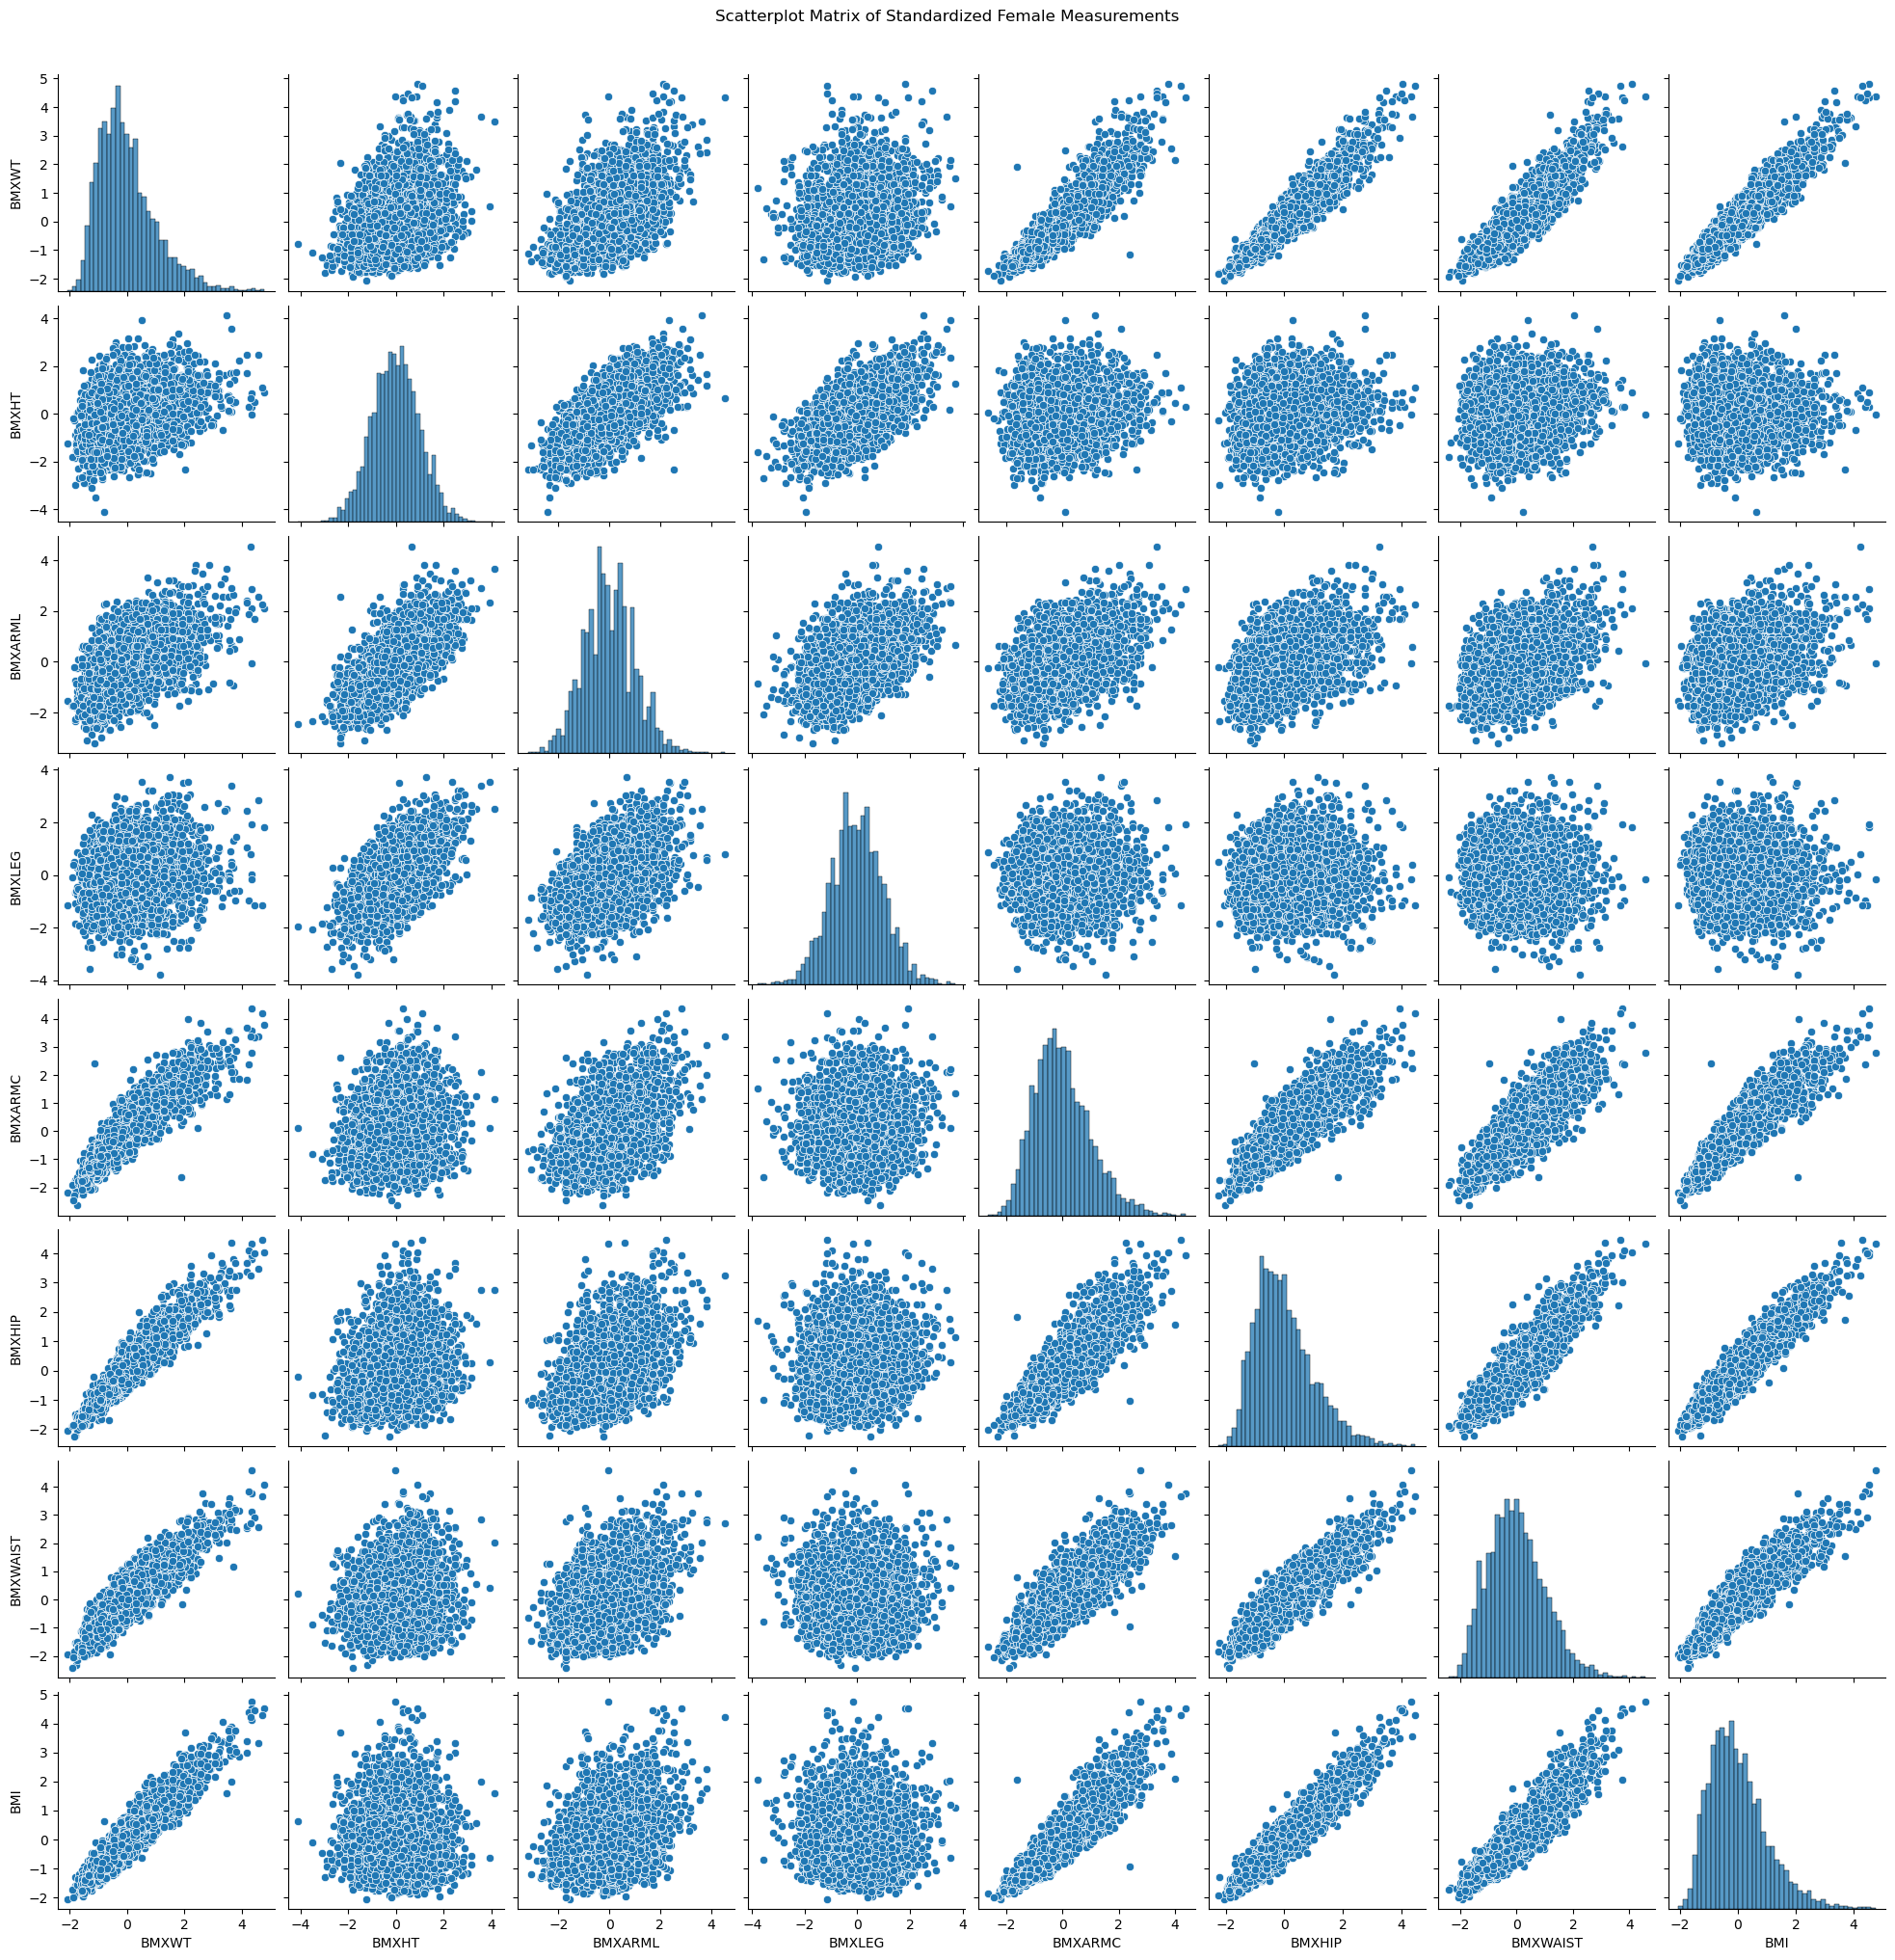

Pearson Correlation Matrix:
              BMXWT     BMXHT   BMXARML    BMXLEG   BMXARMC    BMXHIP  \
BMXWT     1.000000  0.345496  0.551563  0.193186  0.905385  0.946553   
BMXHT     0.345496  1.000000  0.667911  0.657202  0.151955  0.202895   
BMXARML   0.551563  0.667911  1.000000  0.475645  0.453122  0.459400   
BMXLEG    0.193186  0.657202  0.475645  1.000000  0.079876  0.100268   
BMXARMC   0.905385  0.151955  0.453122  0.079876  1.000000  0.868063   
BMXHIP    0.946553  0.202895  0.459400  0.100268  0.868063  1.000000   
BMXWAIST  0.904550  0.126547  0.427893 -0.034803  0.845065  0.897407   
BMI       0.945864  0.032982  0.364575 -0.014899  0.915361  0.944179   

          BMXWAIST       BMI  
BMXWT     0.904550  0.945864  
BMXHT     0.126547  0.032982  
BMXARML   0.427893  0.364575  
BMXLEG   -0.034803 -0.014899  
BMXARMC   0.845065  0.915361  
BMXHIP    0.897407  0.944179  
BMXWAIST  1.000000  0.921203  
BMI       0.921203  1.000000  

Spearman Correlation Matrix:
             

In [54]:
columns1 = ['BMXWT','BMXHT','BMXARML','BMXLEG','BMXARMC', 'BMXHIP','BMXWAIST', 'BMI']  
zfemale_df = pd.DataFrame(zfemale, columns=columns1) 
zfemale_selected = zfemale_df[columns1]

sns.pairplot(zfemale_selected)
plt.suptitle("Scatterplot Matrix of Standardized Female Measurements", y=1.02)
plt.show()

pearson_corr = zfemale_selected.corr(method='pearson')
spearman_corr = zfemale_selected.corr(method='spearman')

print("Pearson Correlation Matrix:\n", pearson_corr)
print("\nSpearman Correlation Matrix:\n", spearman_corr)

## Waist-to-Height Ratio (WHtR) and Waist-to-Hip Ratio (WHR) for male and female data

In [55]:
female_df = female_df.dropna(subset=['BMXWT', 'BMXHT', 'BMXWAIST', 'BMXHIP'])
height_m = female_df['BMXHT'] / 100
female_bmi = female_df['BMXWT'] / (height_m ** 2)
female_bmi = np.round(female_bmi, 1)

female_whtr = female_df['BMXWAIST'] / female_df['BMXHT']
female_whtr = np.round(female_whtr, 2)

female_whr = female_df['BMXWAIST'] / female_df['BMXHIP']
female_whr = np.round(female_whr, 2)

female_matrix = female_df.to_numpy()
female_matrix = np.column_stack((female_matrix, female_whtr, female_whr))
fmd= pd.DataFrame(female_matrix)

print("Updated Female matrix shape:", female_matrix.shape)
print(fmd.describe())


Updated Female matrix shape: (4221, 10)
                 0            1            2            3            4  \
count  4221.000000  4221.000000  4221.000000  4221.000000  4221.000000   
mean     77.403791   160.136792    36.031035    37.157972    32.710329   
std      21.545061     7.062859     2.346150     3.214914     5.609625   
min      32.600000   131.100000    28.500000    25.000000    17.900000   
25%      61.600000   155.300000    34.400000    35.000000    28.700000   
50%      73.600000   160.100000    36.000000    37.100000    32.100000   
75%      88.700000   164.800000    37.500000    39.300000    36.100000   
max     180.900000   189.300000    46.700000    49.100000    57.200000   

                 5            6            7            8            9  
count  4221.000000  4221.000000  4221.000000  4221.000000  4221.000000  
mean    109.178370    98.488107    30.103127     0.615586     0.899917  
std      15.624294    17.399588     7.755602     0.108094     0.072323  
m

In [56]:
male_df = male_df.dropna(subset=['BMXWT', 'BMXHT', 'BMXWAIST', 'BMXHIP'])

height_m = male_df['BMXHT'] / 100

male_bmi = male_df['BMXWT'] / (height_m ** 2)
male_bmi = np.round(male_bmi, 1)

male_whtr = male_df['BMXWAIST'] / male_df['BMXHT']
male_whtr = np.round(male_whtr, 2)

male_whr = male_df['BMXWAIST'] / male_df['BMXHIP']
male_whr = np.round(male_whr, 2)

male_matrix = male_df.to_numpy()
male_matrix = np.column_stack((male_matrix, male_bmi, male_whtr, male_whr))
md=pd.DataFrame(male_matrix)

print("Updated Male matrix shape:", male_matrix.shape)
print(md.describe())

Updated Male matrix shape: (4081, 10)
                 0            1            2            3            4  \
count  4081.000000  4081.000000  4081.000000  4081.000000  4081.000000   
mean     88.364543   173.827028    39.215045    41.341240    34.334183   
std      21.421561     7.662410     2.435982     3.214881     4.785677   
min      36.800000   144.600000    29.600000    27.500000    19.000000   
25%      73.300000   168.600000    37.500000    39.200000    31.000000   
50%      85.000000   173.800000    39.100000    41.200000    34.000000   
75%      99.800000   178.900000    40.900000    43.500000    37.300000   
max     204.600000   199.600000    49.900000    53.000000    53.600000   

                 5            6            7            8            9  
count  4081.000000  4081.000000  4081.000000  4081.000000  4081.000000  
mean    104.495099   101.789414    29.143298     0.585901     0.970806  
std      12.211841    16.540779     6.313386     0.093718     0.077276  
min

## BOX PLOT FOR COMPARING RATIOS - WHtR , WHR

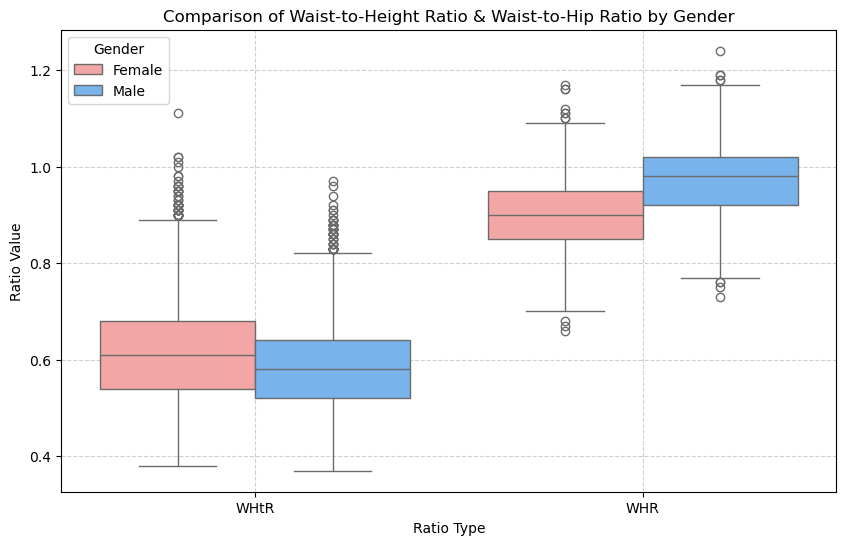

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_boxplot = pd.DataFrame({
    'Gender': ['Female'] * len(female_matrix) + ['Male'] * len(male_matrix),
    'WHtR': np.concatenate((female_matrix[:, -2], male_matrix[:, -2])), 
    'WHR': np.concatenate((female_matrix[:, -1], male_matrix[:, -1]))   
})

df_melted = df_boxplot.melt(id_vars=['Gender'], var_name='Ratio Type', value_name='Value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratio Type', y='Value', hue='Gender', data=df_melted, palette=['#ff9999', '#66b3ff'])
plt.title("Comparison of Waist-to-Height Ratio & Waist-to-Hip Ratio by Gender")
plt.ylabel("Ratio Value")
plt.xlabel("Ratio Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## Advantages and Disadvantages of BMI, Waist-to-Height Ratio (WHtR), and Waist-to-Hip Ratio (WHR)

### 1. Body Mass Index (BMI)

### 2. Waist-to-Height Ratio (WHtR)

### 3. Waist-to-Hip Ratio (WHR)

## STANDARDIZATION OF BMI'S

In [58]:
bmi_index = -1  

sorted_indices = np.argsort(female_matrix[:, bmi_index])  
lowest_bmi_indices = sorted_indices[:5]
highest_bmi_indices = sorted_indices[-5:]

z_lowest_bmi = zfemale[lowest_bmi_indices]
z_highest_bmi = zfemale[highest_bmi_indices]

columns = ['BMXWT', 'BMXHT', 'BMXARML', 'BMXLEG', 'BMXARMC', 'BMXHIP', 'BMXWAIST', 'BMI']
df_lowest_bmi = pd.DataFrame(z_lowest_bmi, columns=columns)
df_highest_bmi = pd.DataFrame(z_highest_bmi, columns=columns)

print("\nStandardized Measurements for 5 Persons with Lowest BMI:")
print(df_lowest_bmi)

print("\nStandardized Measurements for 5 Persons with Highest BMI:")
print(df_highest_bmi)



Standardized Measurements for 5 Persons with Lowest BMI:
      BMXWT     BMXHT   BMXARML    BMXLEG   BMXARMC    BMXHIP  BMXWAIST  \
0  1.930890  0.702803  0.839332  2.439554  1.424448  2.254553 -0.160259   
1 -0.608276  0.433758 -0.610023  0.261944 -0.572357 -0.849955 -1.953617   
2 -0.733610  1.580738  0.285167  1.257423 -1.392473 -0.433887 -1.643228   
3 -0.719684  0.249675 -0.439510  0.510814 -0.804129 -0.427486 -1.522521   
4  0.125158 -0.727383  0.157283  0.199727  1.834506  1.313599 -0.447656   

        BMI  
0  1.753376  
1 -0.774129  
2 -1.173888  
3 -0.838606  
4  0.412251  

Standardized Measurements for 5 Persons with Highest BMI:
      BMXWT     BMXHT   BMXARML    BMXLEG   BMXARMC    BMXHIP  BMXWAIST  \
0 -0.093016 -0.585780  0.796704 -0.391339 -0.001842 -0.517100  0.799648   
1  3.583436  1.240892  0.413051 -0.049143  1.299647  2.228949  3.593148   
2 -0.037312  0.901046  0.924588  0.106400 -0.197956 -0.651522  0.966338   
3  0.041602 -1.152190 -1.249444 -1.480144 -0.411